# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

from scipy.io import loadmat

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Data Import

In [3]:
train_data = loadmat(r'/content/drive/MyDrive/Project_placement/FacePCA/train_set.mat')
test_data  = loadmat(r'/content/drive/MyDrive/Project_placement/FacePCA/test_set.mat')

In [4]:
# train_data http://localhost:8888/notebooks/OneDrive/Desktop/Jupyter%20Notebook/Intro%20To%20ML/PA3.ipynb#

In [5]:
train_data['data'].shape

(320, 10304)

In [6]:
train_img = train_data['data']
test_img = test_data['data']

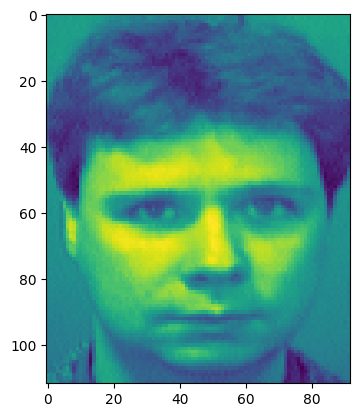

In [7]:
imshow(train_data['data'][120,:].reshape(112,92))

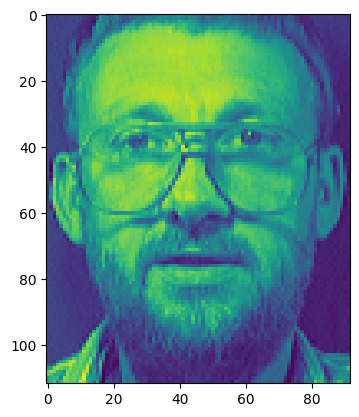

In [8]:
imshow(test_data['data'][10,:].reshape(112,92))

# Task 1 - Visualisation and Preprocessing

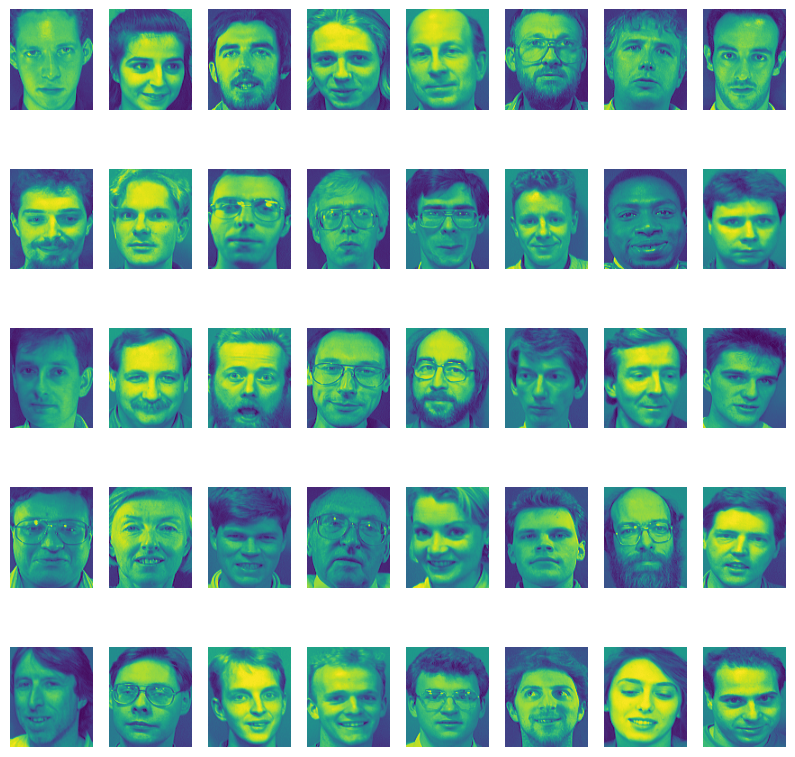

In [9]:
# Train Images Visualization
def image_vis(train_img, factor= 8):
    """
      train_img - is the image vector
      facor - If factor is 8 then we are printing train images and for factor = 2 we are printing test images
    """
    plt.figure(figsize = (10,10))
    for i in range(0,40):
        plt.subplot(5,8,i+1)
        imshow(train_img[i*factor,:].reshape(112,92))
        plt.axis('off')
image_vis(train_img, factor= 8)

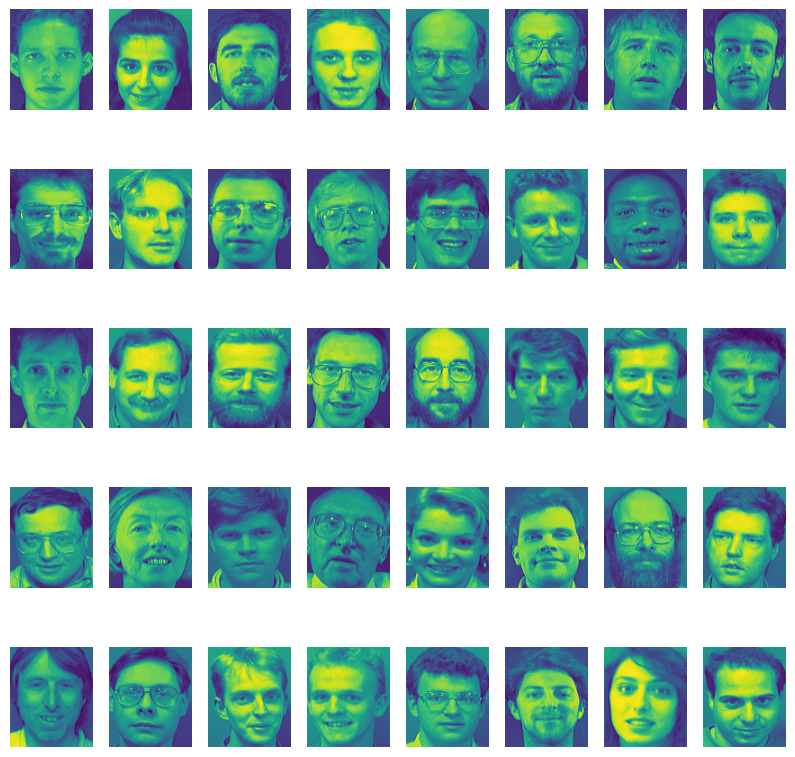

In [10]:
# Test Images Visualisation
image_vis(test_img, factor= 2)

(-0.5, 91.5, 111.5, -0.5)

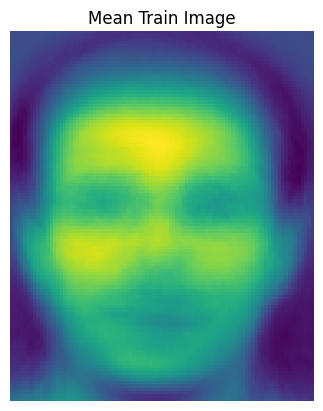

In [11]:
# Visualising mean image for training data set
train_mean = train_img.mean(axis=0)
imshow(train_mean.reshape(112,92))
plt.title('Mean Train Image')
plt.axis('off')

(-0.5, 91.5, 111.5, -0.5)

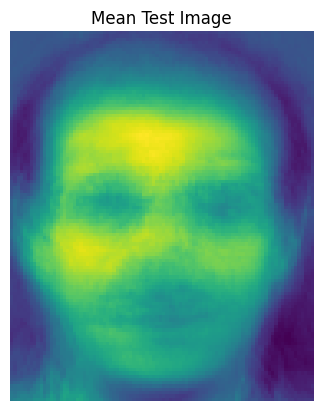

In [12]:
# Visualising mean image for test data set
test_mean = test_img.mean(axis=0)
imshow(test_mean.reshape(112,92))
plt.title('Mean Test Image')
plt.axis('off')

In [13]:
# Centering Both test and train data
train_img_center = train_img - train_mean
test_img_center = test_img - test_mean

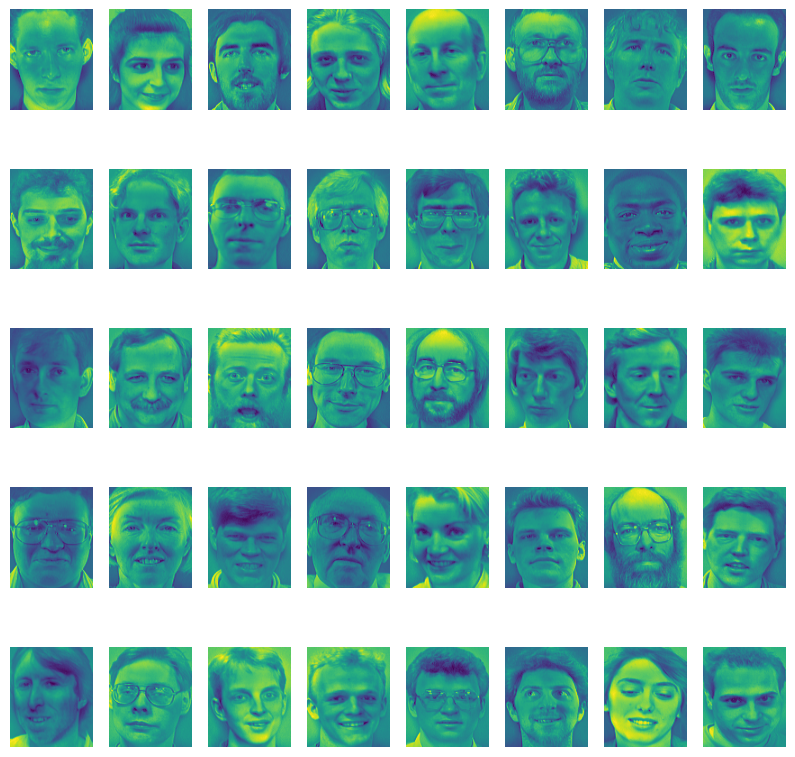

In [14]:
# Centered Train Images Visualization
image_vis(train_img_center, factor= 8)

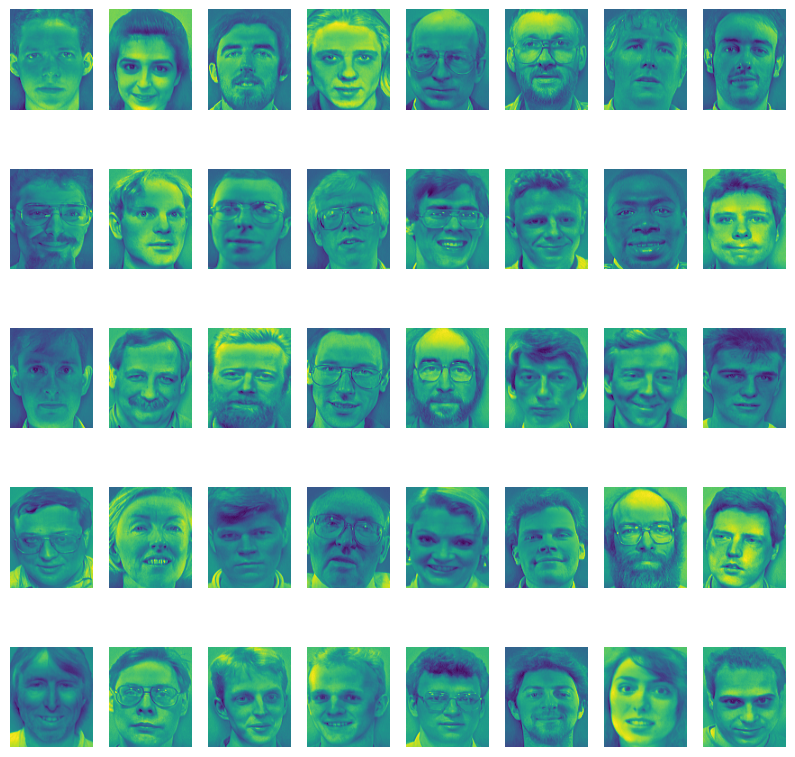

In [15]:
# Centered Test Images Visualization
image_vis(test_img_center, factor= 2)

# Task 2 - Eigen Vectors (Eigen Faces)

In [16]:
train_img_center.shape

(320, 10304)

In [17]:
cov_mat = np.matmul(train_img_center.T,train_img_center)

In [18]:
cov_mat.shape

(10304, 10304)

In [19]:
eigval, eigvec = np.linalg.eig((1/320)*cov_mat)

In [20]:
dominant_eigval25 = eigval[0:25]

In [21]:
dominant_eigval25

array([2789785.4360973 +0.j, 2115297.30694131+0.j, 1087968.61113764+0.j,
        915617.52576769+0.j,  822183.14737798+0.j,  520669.11310378+0.j,
        389625.33695193+0.j,  385885.86583007+0.j,  320565.78650293+0.j,
        287055.01179331+0.j,  232231.20502465+0.j,  216856.35576327+0.j,
        183219.34175271+0.j,  170011.58864863+0.j,  157774.55380099+0.j,
        154945.43848763+0.j,  142423.27331394+0.j,  131748.21944179+0.j,
        114705.61258144+0.j,  110375.3815001 +0.j,  109128.03034019+0.j,
        100892.623652  +0.j,   99332.6478264 +0.j,   92442.3667032 +0.j,
         85141.06497146+0.j])

In [22]:
dominant_eigvec15 = eigvec[:,0:25]

In [23]:
dominant_eigvec15.shape

(10304, 25)

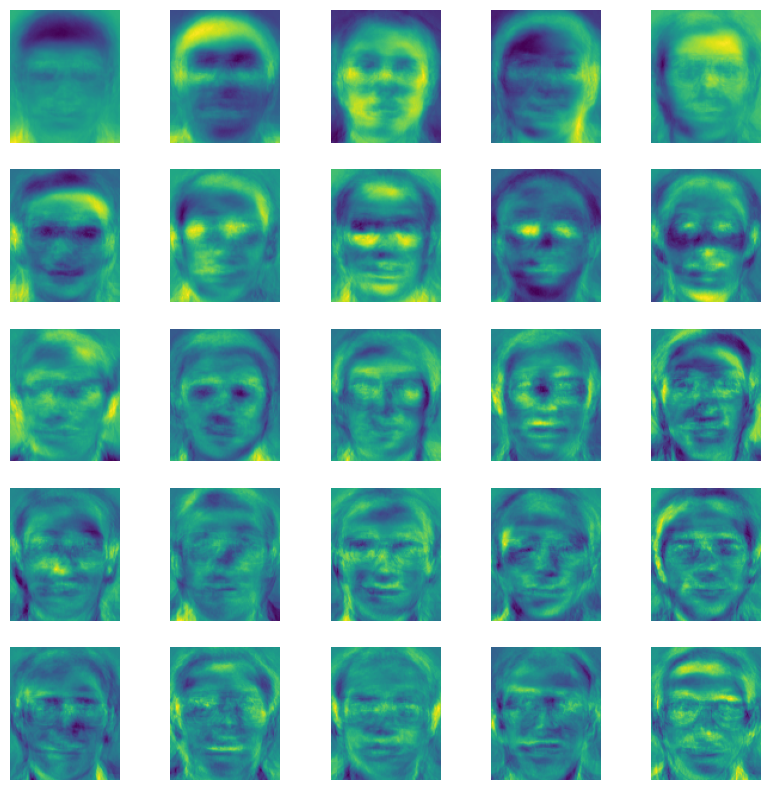

In [24]:
# Displaying Top 25 Dominant Eigen Faces
plt.figure(figsize = (10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(np.real(dominant_eigvec15[:,i].reshape(112,92)))
    plt.axis('off')

# Dominant Eigen faces reveal the principle component directions along which if we regenerate our original images,
# we will get the least error and we will be able to reduce the dimensionality of the data

Text(0, 0.5, 'Eigen Value')

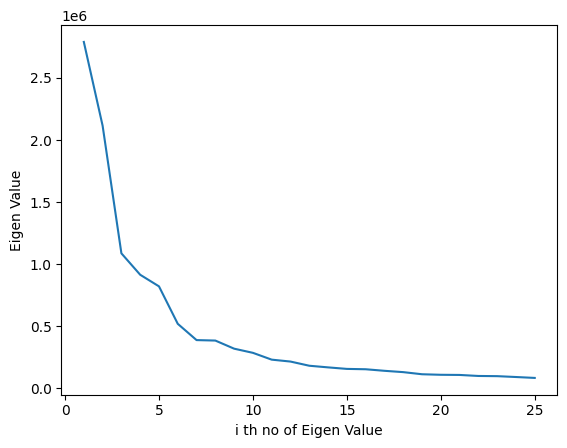

In [25]:
plt.plot(np.linspace(1,25,25),np.real(dominant_eigval25))
plt.xlabel('i th no of Eigen Value')
plt.ylabel('Eigen Value')

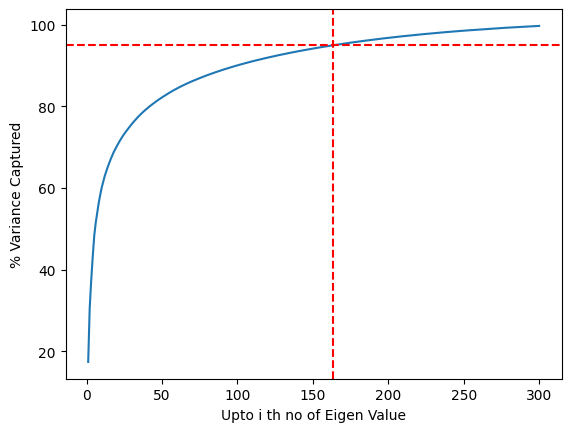

In [26]:
# Printing graph btw Number of Eigen values and Variance Captured
eigval_uptoi = []
flag = True
optimal_eigval_no = 0
for i in range(0,300):
    eigval_uptoi.append(np.sum(eigval[0:i+1])/np.sum(eigval))
    if eigval_uptoi[i] > 0.95 and flag == True:
        optimal_eigval_no = i
        flag = False

plt.plot(np.linspace(1,300,300),np.real(eigval_uptoi)*100)
plt.xlabel('Upto i th no of Eigen Value')
plt.ylabel('% Variance Captured')
plt.axvline(x= optimal_eigval_no , color= 'red', linestyle ='--')
plt.axhline(y= np.real(eigval_uptoi[optimal_eigval_no])*100 , color= 'red', linestyle ='--')

In [27]:
print(f' Optimum number of Principle Components to be taken to have capture variance greater than 95% is {optimal_eigval_no+1}')

 Optimum number of Principle Components to be taken to have capture variance greater than 95% is 164


In [28]:
optimum_eigvec = eigvec[:,0:164]

In [29]:
optimum_eigvec.shape

(10304, 164)

# Task 3 - Face Recognition

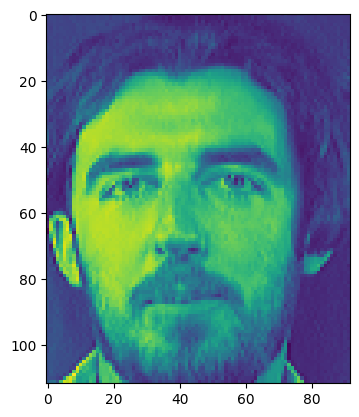

In [49]:
imshow(train_data['data'][19,:].reshape(112,92))

In [50]:
datapt = train_img_center[19,:]

In [51]:
train_img_center.shape

(320, 10304)

In [52]:
# Function to reconstruct an image using PCA
def ReconsData(datapt, mean_img):
    recons_scalars = np.matmul(datapt.T,optimum_eigvec)
    recons_datapt = np.zeros(datapt.shape)
    for i in range(164):
        recons_datapt += np.real(recons_scalars[i] * optimum_eigvec[:,i])
    recons_datapt += mean_img
    return recons_datapt

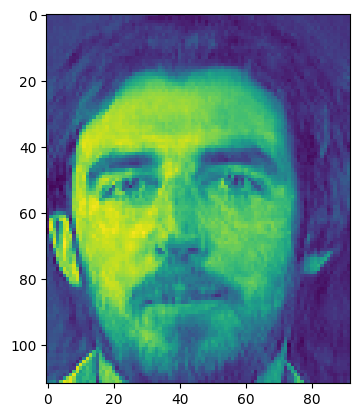

In [53]:
imshow(ReconsData(datapt, train_mean).reshape(112,92))

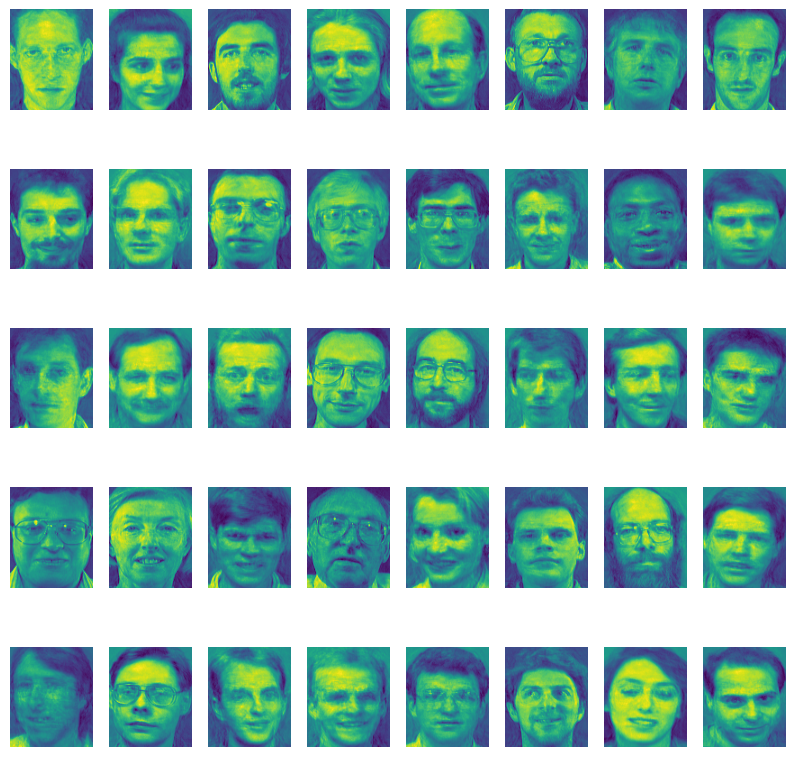

In [54]:
# Reconstructing Train Images using PCA
recons_train = []
for i in range(0,320):
    recons_train.append(ReconsData(train_img_center[i,:], train_mean))
recons_train = np.asarray(recons_train)

plt.figure(figsize = (10,10))
for i in range(0,40):
    plt.subplot(5,8,i+1)
    imshow(recons_train[i*8,:].reshape(112,92))
    plt.axis('off')

In [55]:
recons_train.shape

(320, 10304)

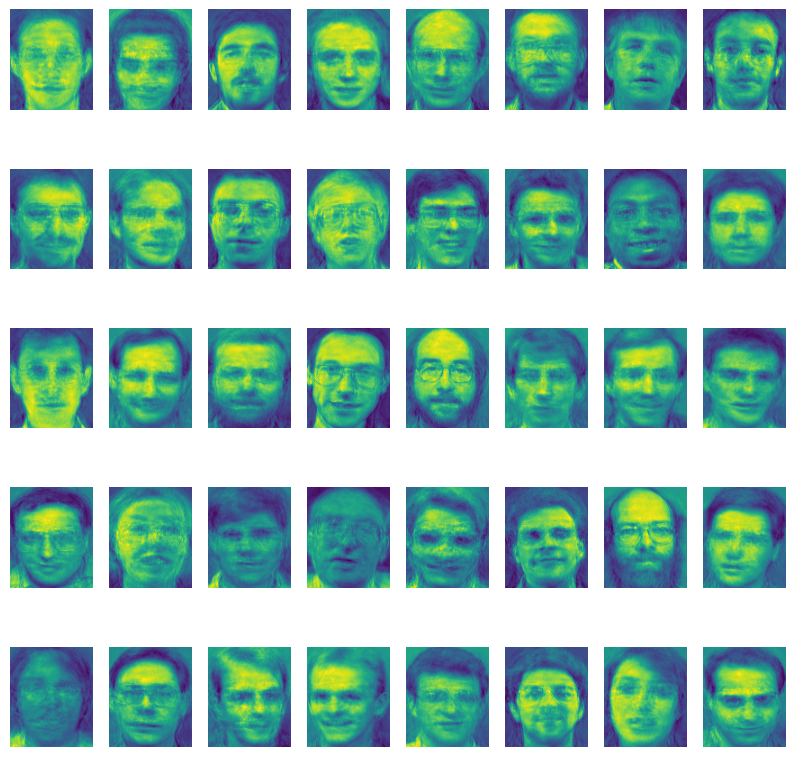

In [56]:
# Reconstructing Test Images using PCA
recons_test = []
for i in range(0,40):
    recons_test.append(ReconsData(test_img_center[i*2,:], test_mean))
recons_test = np.asarray(recons_test)

plt.figure(figsize = (10,10))
for i in range(0,40):
    plt.subplot(5,8,i+1)
    imshow(recons_test[i,:].reshape(112,92))
    plt.axis('off')

In [57]:
error_min_index = []

for j in range(40):
    test_index = j
    error = []
    for i in range(0,320):
        error.append(np.linalg.norm(recons_train[i] - test_img[test_index])**2)

    error = np.array( error )
    error_min_index.append( np.where(error == np.min(error))[0][0] )

error_min_index = np.asarray(error_min_index)

In [58]:
def comparison(index):
    i = index

    plt.subplot(1,2,1)
    imshow((test_img[i,:]).reshape(112,92))
    plt.title('Test Image')

    plt.subplot(1,2,2)
    imshow((train_img[error_min_index[i],:]).reshape(112,92))
    plt.title('Closest Train Image')

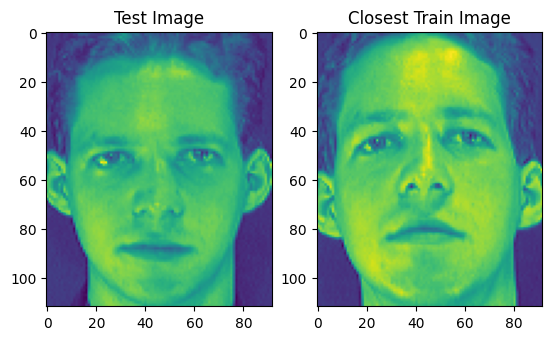

In [59]:
comparison(0)

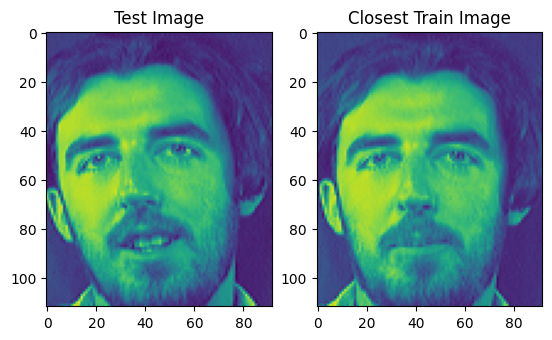

In [60]:
comparison(5)

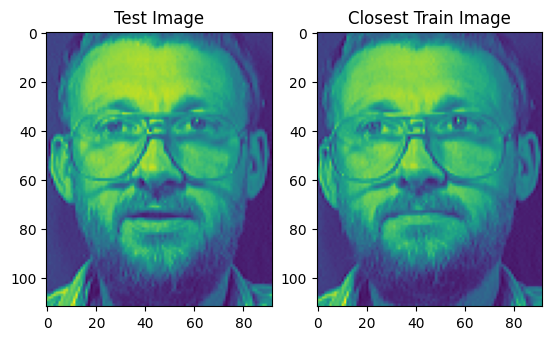

In [61]:
comparison(10)

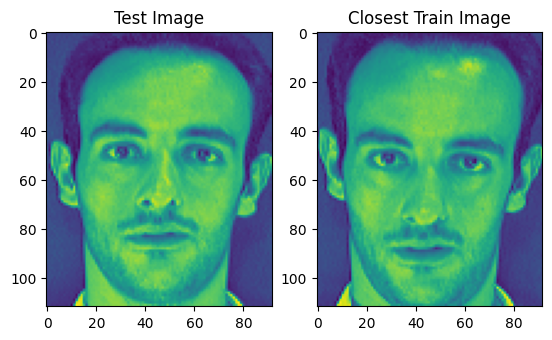

In [62]:
comparison(15)

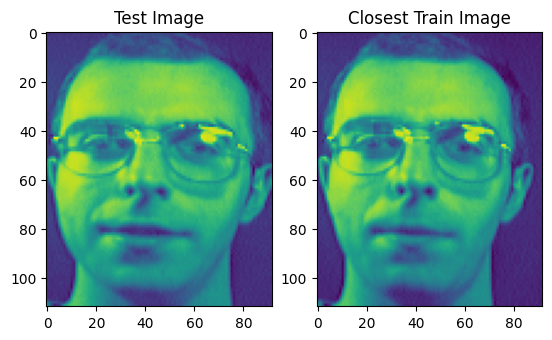

In [63]:
comparison(20)

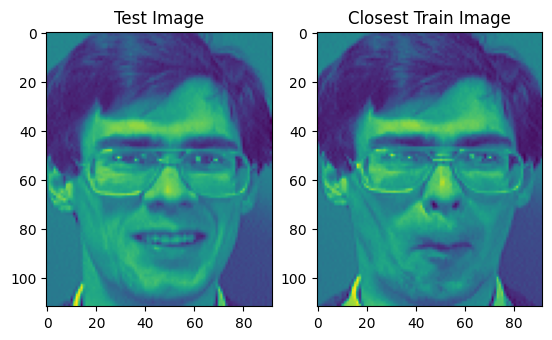

In [64]:
comparison(25)

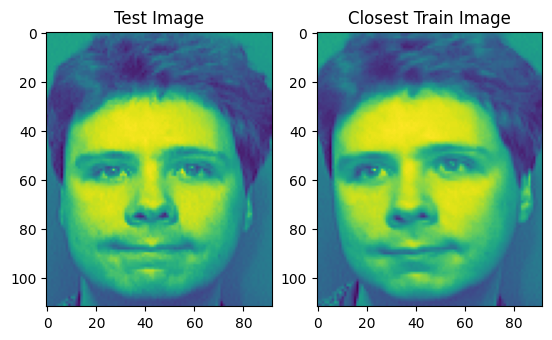

In [65]:
comparison(30)

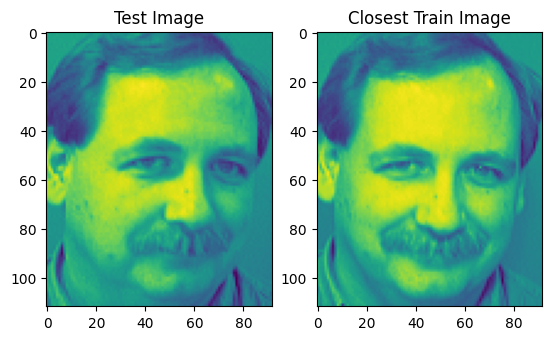

In [66]:
comparison(35)

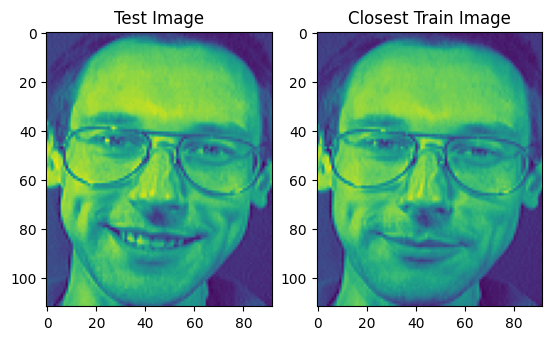

In [67]:
comparison(39)